In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression

In [37]:
!pip install tensorflow

import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Trabajo Práctico 1

$\textbf{Consigna}$


En el primer TP se utilizarán dos datasets para abordar respectivamente un problema de clasificación (inferir clases discretas) y un problema de regresión (inferir valores continuos). Los datasets a utilizar serán:

- $\textbf{Dataset Yeast:}$ (https://archive.ics.uci.edu/ml/datasets/Yeast) es un dataset para construir un predictor de sitios específicos de anclaje de proteínas de levaduras basado en información de las secuencias de aminoácidos que forman a la proteína (problema de clasificación multiclase).
- $\textbf{Physicochemical Properties of Protein Tertiary Structure Data Set:}$ (https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure) es un dataset para construir un predictor del tamaño de residuos de proteínas en términos de características físico-químicas de las mismas (problema de regresión).

Inicialmente se requiere hacer un análisis exploratorio de datos (EDA) para ganar conocimiento de la estadística de los datos y relaciones elementales entre ellos. Para ello se requiere hacer: Explorar el balance de clases (para el problema multiclase), correlaciones de a pares de las variables e histogramas, discriminando por clase (para el problema multiclase).

Para hacer el EDA se recomienda el uso de la librería de Python Pandas para manipular y estructurar los datos y las librerías de Matplotlib y/o Seaborn para hacer la visualización.

Mediante la librería scikit-learn de Python aplicar los modelos vistos en clase para desarollar un clasificador multiclase y un modelo de regresión.

Entregar una notebook de python con todo el desarrollo del EDA y del/los modelo/s de clasificación y regresión. Evaluar métricas de micro-macro F1-score para clasificación y MSE para regresión. La entrega debe ser subiendo el notebook de Jupyter o notebook de Google Colab a una cuenta de Github y notificar la entrega.

En el caso del problema de clasificación, resolver un problema multiclase con al menos 3 clases. Pueden seleccionarse por ejemplo las tres clases más significativas. Además, a partir del dataset original, armar un dataset para resolver un problema de clasificación binario. Para ello se pueden unificar clases con algún criterio que lo justifique o tomar las dos clases más representativas. Entrenar un modelo para resolver este nuevo problema binario y evaluar las métricas AUC-ROC.

En el caso del problema de regresión, hacer ingeniería de features generando features polinomiales y evaluar con un conjunto de validación cuál es la mejor elección de features polinomiales.

Opcionalmente se pueden ensayar modelos de redes neuronales de perceptrón multicapa (MLP).

# Yeast Data Set

A partir de la web de la base de datos y del archivo $\texttt{yeast.names}$ se obtuvo la siguiente información:

* Data Set Characteristics: Multivariate

* Number of Instances:  1484

* Number of Attributes: 9 (8 predictive, 1 name)
	     
* Attribute Information:
  - Sequence Name: Accession number for the SWISS-PROT database
  - mcg: McGeoch's method for signal sequence recognition.
  - gvh: von Heijne's method for signal sequence recognition.
  - alm: Score of the ALOM membrane spanning region prediction program.
  - mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and  non-mitochondrial proteins.
  - erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
  - pox: Peroxisomal targeting signal in the C-terminus.
  - vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
  - nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.


* Missing Attribute Values: None.

* Class Distribution. The class is the localization site.
  - CYT (cytosolic or cytoskeletal): 463
  - NUC (nuclear): 429
  - MIT (mitochondrial): 244
  - ME3 (membrane protein, no N-terminal signal): 163
  - ME2 (membrane protein, uncleaved signal): 51
  - ME1 (membrane protein, cleaved signal): 44
  - EXC (extracellular): 37
  - VAC(vacuolar): 30
  - POX (peroxisomal): 20
  - ERL (endoplasmic reticulum lumen): 5

* Associated Tasks: Classification

In [3]:
features_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
columns_names = ['Sequence name'] + features_names + ['Class']

df = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/yeast.data', names = columns_names, sep='\s+')

In [4]:
df

,Sequence name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


## Análisis exploratorio de datos

Empezamos corroborando el número de instancias, y las clases presentes en el dataset.

In [5]:
clases = df['Class'].unique()
print('Clases:', clases)

Clases: ['MIT' 'NUC' 'CYT' 'ME1' 'EXC' 'ME2' 'ME3' 'VAC' 'POX' 'ERL']


In [6]:
n = len(df)
print('Número de instancias:', n)

Número de instancias: 1484


Seguimos con el balance de clases, corroborando que coincide con la información acerca del database.

In [7]:
n_Y = df['Class'].value_counts()
print('Balance de clases:')
print(n_Y)

Balance de clases:
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: Class, dtype: int64


Luego se calculó la probabilidad a priori de pertenecer a cada clase.

In [66]:
P_a_priori = n_Y / n
print('Probabilidad a priori de pertenecer a cada clase:')
print(P_a_priori)

Probabilidad a priori de pertenecer a cada clase:
CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: Class, dtype: float64


Ahora vemos un resumen del dataset por atributo, incluyendo media (mean), desviación estándar (std), primer cuatril (25%), mediana (50%), tercer cuartil (75%) y valores mínimos (min) y máximos (max). Podemos notar que los valores de todos los atributos pertenecen al rango [0,1].

In [9]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


La siguiente figura muestra el histograma de cada atributo para poder observar su distribución. Vemos que los atributos erl y pox solo presentan 2 valores cada uno, pudiendo considerarse booleanos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3310dc1b10>,
      dtype=object)

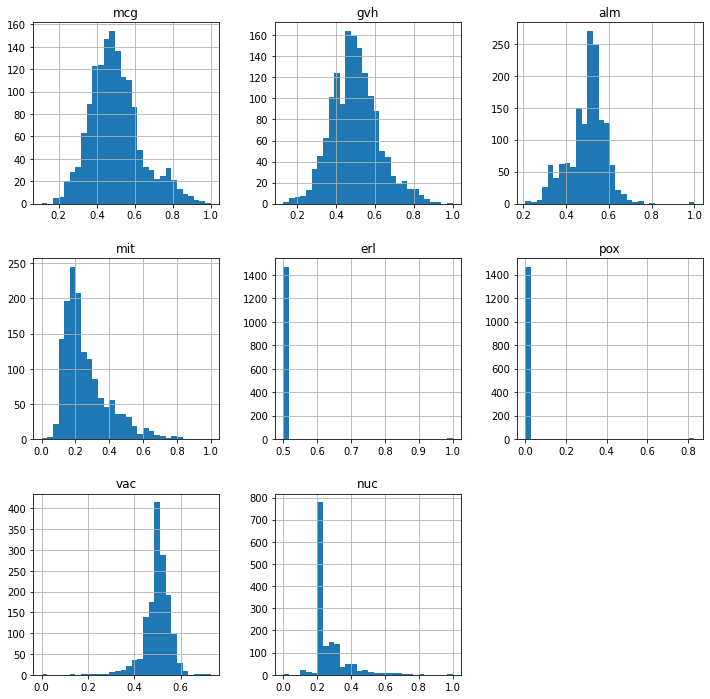

In [10]:
fig, ax = plt.subplots(figsize = (12,12))
df[features_names].hist(ax = ax, bins = 30)

En la siguiente figura vemos las correlaciones de a pares de las variables (pairplot) de los atributos según la clase. En los gráficos pertenecientes a la diagonal se observan los histogramas de los atributos por clase.

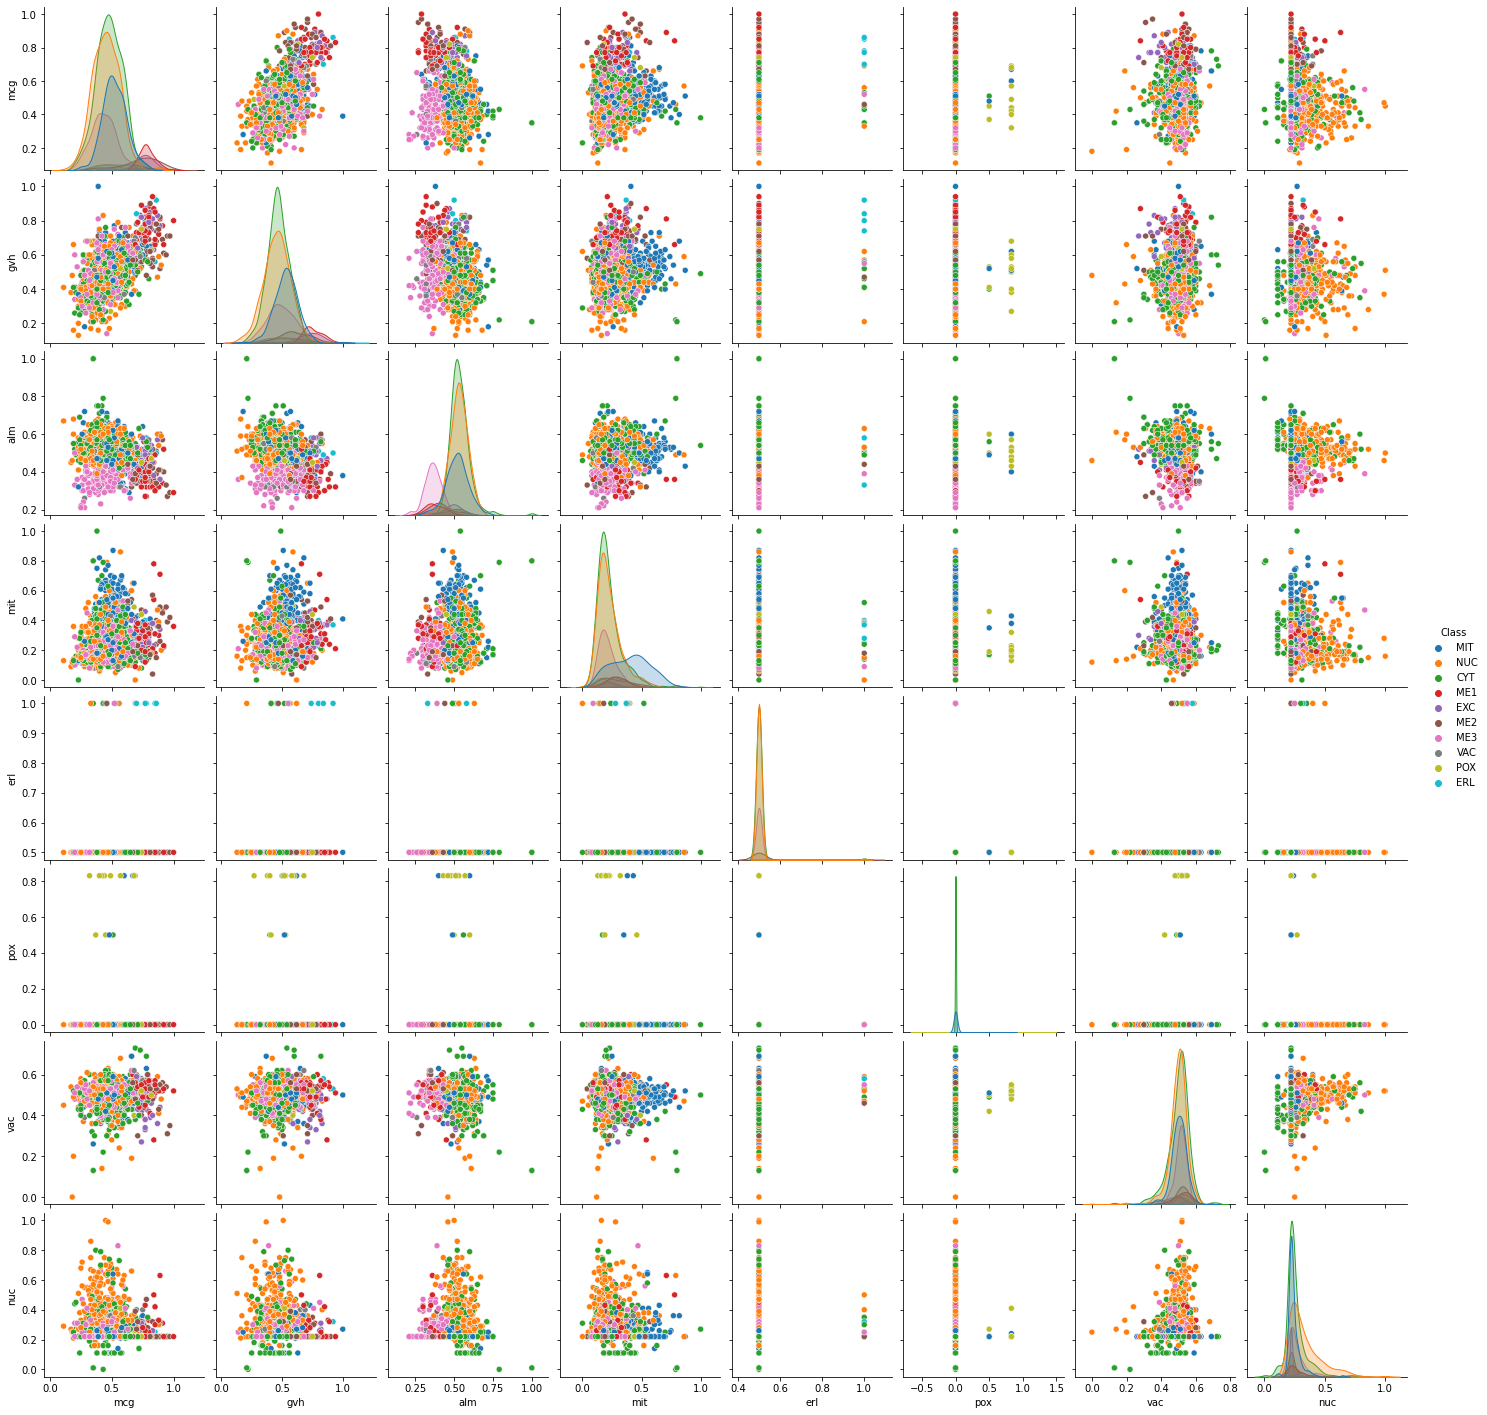

In [11]:
sns.pairplot(df, hue = 'Class')

In [12]:
means = df.groupby('Class').mean()
stds = df.groupby('Class').std()

In [13]:
means

,mcg,gvh,alm,mit,erl,pox,vac,nuc
Class,,,,,,,,
CYT,0.480713,0.469503,0.535421,0.227106,0.504320,0.001080,0.499395,0.257235
ERL,0.792000,0.772000,0.482000,0.336000,1.000000,0.000000,0.546000,0.246000
EXC,0.735429,0.716857,0.492571,0.292000,0.500000,0.000000,0.455714,0.226571
ME1,0.788636,0.756591,0.376136,0.311818,0.500000,0.000000,0.512955,0.268182
ME2,0.721569,0.603137,0.414902,0.282549,0.509804,0.000000,0.510196,0.245490
ME3,0.430859,0.489509,0.364294,0.213497,0.503067,0.000000,0.510123,0.270000
MIT,0.521434,0.533238,0.517377,0.404426,0.500000,0.008852,0.501680,0.240984
NUC,0.452448,0.456131,0.529324,0.228345,0.503497,0.000000,0.494103,0.331678
POX,0.521000,0.508000,0.506500,0.247500,0.500000,0.423500,0.503000,0.234000


In [14]:
stds

,mcg,gvh,alm,mit,erl,pox,vac,nuc
Class,,,,,,,,
CYT,0.107442,0.092115,0.064702,0.115165,0.046323,0.023237,0.064028,0.094908
ERL,0.065345,0.135351,0.092033,0.066558,0.000000,0.000000,0.020736,0.043359
EXC,0.110596,0.107478,0.054629,0.070869,0.000000,0.000000,0.070096,0.019695
ME1,0.067120,0.073293,0.059698,0.127302,0.000000,0.000000,0.060945,0.089372
ME2,0.160367,0.120391,0.075535,0.125473,0.070014,0.000000,0.060712,0.051704
ME3,0.098898,0.114238,0.054342,0.080189,0.039163,0.000000,0.035276,0.090833
MIT,0.097238,0.098515,0.072926,0.165850,0.000000,0.081364,0.046508,0.056980
NUC,0.110932,0.109942,0.058332,0.109897,0.041714,0.000000,0.060666,0.136078
POX,0.133176,0.113536,0.050812,0.111113,0.000000,0.404778,0.040275,0.043698


El dataset cuenta con 8 atributos. Debido a que las variables erl y pox son dicotómicas y establecidas mayoritariamente en uno de sus 2 valores, se eliminaron. Además, luego se encontró que los scores mejoraban cuando se las eliminaba.



In [71]:
df_ = df.drop(['erl', 'pox'], axis = 1)
df_

,Sequence name,mcg,gvh,alm,mit,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.53,0.39,NUC


In [26]:
features_names_ = features_names.copy()
features_names_.remove('erl')
features_names_.remove('pox')
print(features_names_)

['mcg', 'gvh', 'alm', 'mit', 'vac', 'nuc']


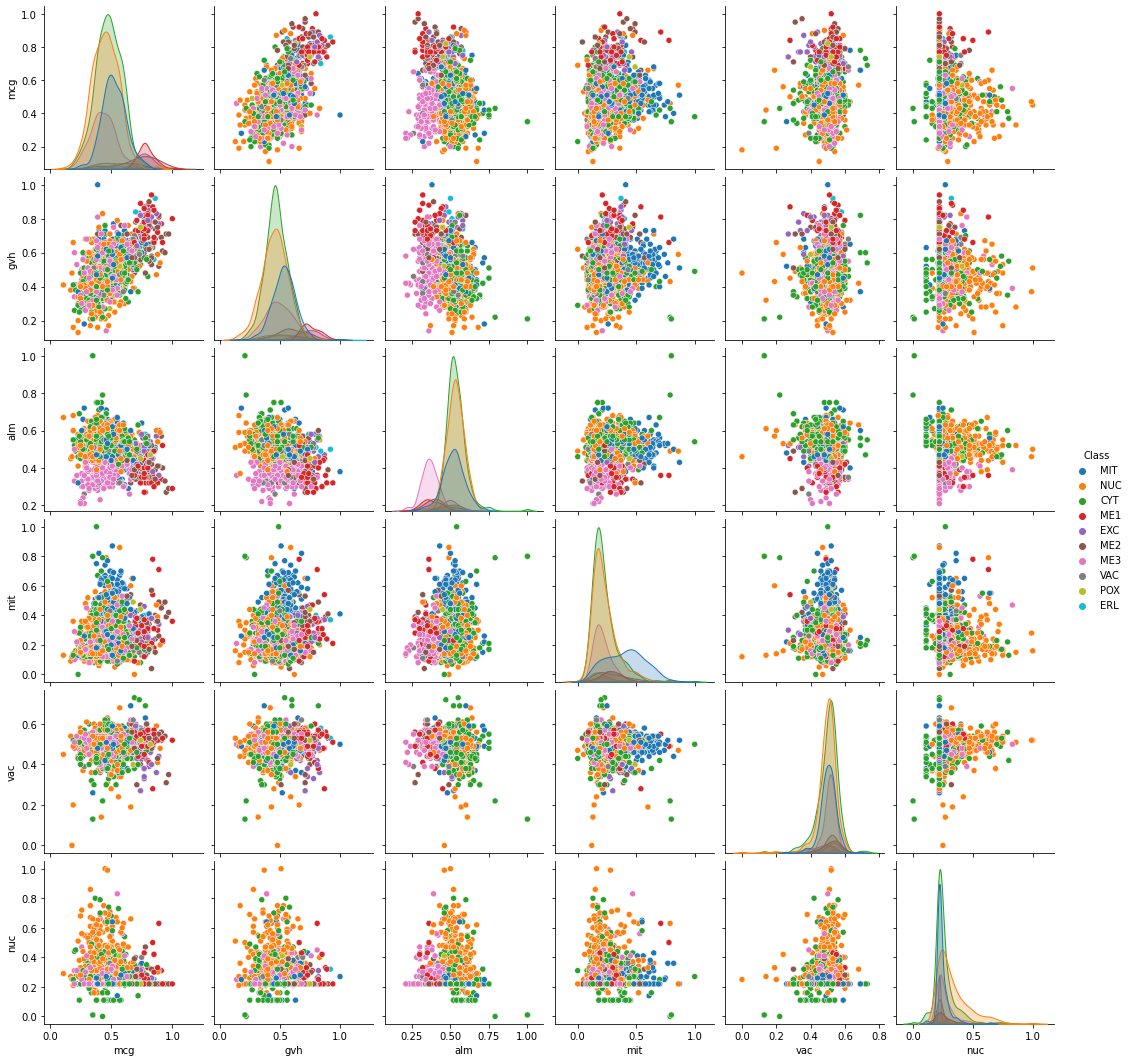

In [82]:
sns.pairplot(df_, hue = 'Class')

In [15]:
print('Porcentaje de la suma de las 4 clases más numerosas:', sum(n_Y[:4])*100/n)

Porcentaje de la suma de las 4 clases más numerosas: 87.53369272237197


El dataset cuenta con 10 clases. Pero para facilitar el posterior análisis, se decidió trabajar con las 4 clases más numerosas: CYT, NUC, MIT y ME3, ya que juntas constituyen el 87,5 % de las instancias de la base de datos.

In [72]:
main_class_names = ['CYT', 'NUC', 'MIT', 'ME3']
df_main = df_[df_['Class'].isin(main_class_names)]
df_main

,Sequence name,mcg,gvh,alm,mit,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...
1477,R29A_YEAST,0.38,0.32,0.64,0.41,0.44,0.11,CYT
1478,R29B_YEAST,0.38,0.40,0.66,0.35,0.43,0.11,CYT
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.48,0.47,NUC
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.53,0.39,NUC


El balance de clases cambió, por lo que se recalculó la probabilidad a priori de pertenecer a cada clase.

In [74]:
n_main = len(df_main)
print(n_main)

1299


In [83]:
n_Y_main = n_Y[main_class_names]
P_a_priori_main = n_Y_main / n_main
print('Probabilidad a priori de pertenecer a cada clase (dentro de las 4 más numerosas):')
print(P_a_priori_main)

Probabilidad a priori de pertenecer a cada clase (dentro de las 4 más numerosas):
CYT    0.356428
NUC    0.330254
MIT    0.187837
ME3    0.125481
Name: Class, dtype: float64


Se realizó nuevamente el resumen del dataset por atributo, y lo mismo pero para cada una de las 4 clases.

In [76]:
df_main.describe()

,mcg,gvh,alm,mit,vac,nuc
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.472771,0.479569,0.508545,0.259115,0.499423,0.280370
std,0.109463,0.105939,0.083692,0.139872,0.057076,0.110976
min,0.110000,0.130000,0.210000,0.000000,0.000000,0.000000
25%,0.400000,0.410000,0.470000,0.160000,0.480000,0.220000
50%,0.470000,0.480000,0.520000,0.210000,0.510000,0.220000
75%,0.550000,0.550000,0.560000,0.310000,0.530000,0.310000
max,0.900000,1.000000,1.000000,1.000000,0.730000,1.000000


In [77]:
df_NUC = df_main[df_main['Class'] == 'CYT']
df_NUC.describe()

,mcg,gvh,alm,mit,vac,nuc
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,0.480713,0.469503,0.535421,0.227106,0.499395,0.257235
std,0.107442,0.092115,0.064702,0.115165,0.064028,0.094908
min,0.190000,0.210000,0.390000,0.000000,0.130000,0.000000
25%,0.410000,0.410000,0.500000,0.160000,0.470000,0.220000
50%,0.480000,0.460000,0.530000,0.190000,0.510000,0.220000
75%,0.560000,0.530000,0.560000,0.260000,0.540000,0.270000
max,0.800000,0.820000,1.000000,1.000000,0.730000,0.800000


En el siguiente resumen se observa como para la clase NUC, el atributo pox es siempre 0. Esto podría llegar a generar problemas.

In [78]:
df_NUC = df_main[df_main['Class'] == 'NUC']
df_NUC.describe()

,mcg,gvh,alm,mit,vac,nuc
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.452448,0.456131,0.529324,0.228345,0.494103,0.331678
std,0.110932,0.109942,0.058332,0.109897,0.060666,0.136078
min,0.110000,0.130000,0.320000,0.000000,0.000000,0.160000
25%,0.370000,0.390000,0.490000,0.160000,0.470000,0.220000
50%,0.450000,0.460000,0.530000,0.200000,0.500000,0.280000
75%,0.530000,0.530000,0.570000,0.270000,0.530000,0.380000
max,0.900000,0.830000,0.680000,0.860000,0.680000,1.000000


In [79]:
df_NUC = df_main[df_main['Class'] == 'MIT']
df_NUC.describe()

,mcg,gvh,alm,mit,vac,nuc
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.521434,0.533238,0.517377,0.404426,0.501680,0.240984
std,0.097238,0.098515,0.072926,0.165850,0.046508,0.056980
min,0.230000,0.180000,0.290000,0.110000,0.260000,0.110000
25%,0.460000,0.470000,0.470000,0.270000,0.480000,0.220000
50%,0.510000,0.530000,0.520000,0.410000,0.500000,0.220000
75%,0.582500,0.590000,0.560000,0.520000,0.530000,0.250000
max,0.810000,1.000000,0.720000,0.870000,0.690000,0.650000


In [80]:
df_ME3 = df_main[df_main['Class'] == 'ME3']
df_ME3.describe()

,mcg,gvh,alm,mit,vac,nuc
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.430859,0.489509,0.364294,0.213497,0.510123,0.270000
std,0.098898,0.114238,0.054342,0.080189,0.035276,0.090833
min,0.200000,0.140000,0.210000,0.080000,0.390000,0.220000
25%,0.365000,0.420000,0.330000,0.160000,0.490000,0.220000
50%,0.430000,0.490000,0.360000,0.200000,0.510000,0.220000
75%,0.490000,0.565000,0.400000,0.260000,0.530000,0.300000
max,0.670000,0.810000,0.500000,0.530000,0.620000,0.830000


También se realizó nuevamente las correlaciones de a pares de las variables.

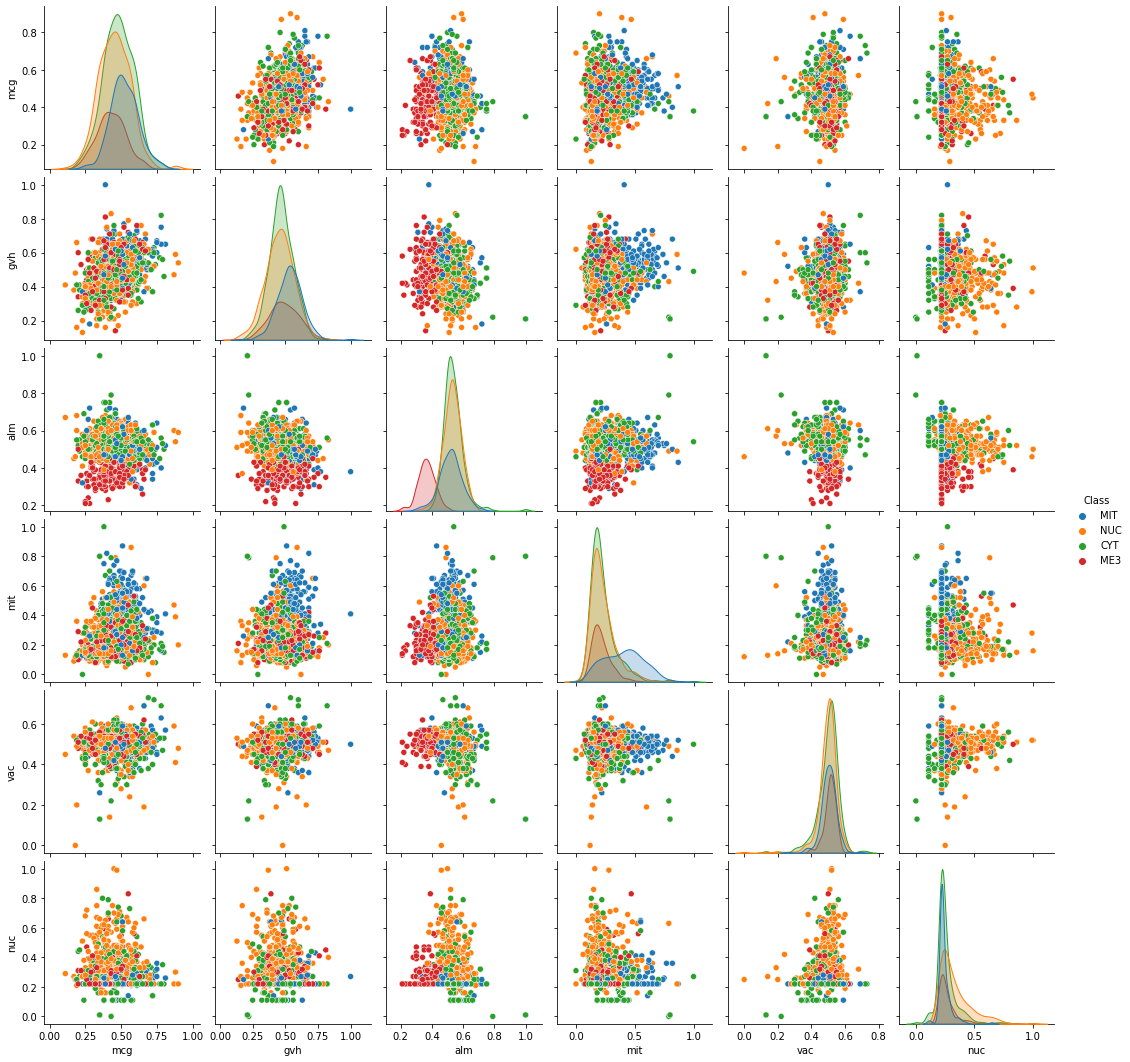

In [81]:
sns.pairplot(df_main, hue = 'Class')

In [ ]:
sns.pairplot(df, hue = 'Class')

## Clasificación Multiclase

In [85]:
df_X = df_main[features_names_]
df_y = df_main['Class']
df_X

,mcg,gvh,alm,mit,vac,nuc
0,0.58,0.61,0.47,0.13,0.48,0.22
1,0.43,0.67,0.48,0.27,0.53,0.22
2,0.64,0.62,0.49,0.15,0.53,0.22
3,0.58,0.44,0.57,0.13,0.54,0.22
4,0.42,0.44,0.48,0.54,0.48,0.22
...,...,...,...,...,...,...
1477,0.38,0.32,0.64,0.41,0.44,0.11
1478,0.38,0.40,0.66,0.35,0.43,0.11
1480,0.47,0.43,0.61,0.40,0.48,0.47
1482,0.43,0.40,0.60,0.16,0.53,0.39


In [86]:
df_y

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
       ... 
1477    CYT
1478    CYT
1480    NUC
1482    NUC
1483    CYT
Name: Class, Length: 1299, dtype: object

Para realizar la clasificación se utilizaron los algoritmos de análisis de discriminante lineal (LDA) y análisis de discriminante cuadrático (QDA).

Para optimizar la performance de los clasificadores se usó la función $\texttt{SelectKBest}$ del paquete $\texttt{sklearn}$ para seleccionar los atributos más relevantes. Con un loop se buscó el número óptimo de atributos para cada clasificador.

Todo se implementó aplicando validación cruzada utilizando la función $\texttt{cross_validate}$ del paquete $\texttt{sklearn}$ para obtener scores menos dependientes de la elección de los conjuntos de entrenamiento y testeo.

### LDA

In [60]:
splits = 5
df_X_bests = []
macros = []
micros = []

for i in range(len(features_names_)):
  clf_LDA = LinearDiscriminantAnalysis()
  df_X_best_LDA = SelectKBest(k=i+1).fit_transform(df_X, df_y)
  df_X_bests.append(df_X_best_LDA)
  cross_val_LDA = cross_validate(estimator = clf_LDA, X = df_X_best_LDA, y = df_y, cv = splits, scoring = ('f1_micro','f1_macro'))
  macro_F1_LDA = np.mean(cross_val_LDA['test_f1_macro'])
  micro_F1_LDA = np.mean(cross_val_LDA['test_f1_micro'])
  macros.append(macro_F1_LDA)
  micros.append(micro_F1_LDA)

print(macros)
print(micros)

[0.38366465520599047, 0.5309595861910884, 0.6345051899131882, 0.6442131035494747, 0.6491936827529103, 0.641347315309079]
[0.4519037719037719, 0.5196109296109295, 0.6097059697059698, 0.6158687258687259, 0.6197148797148797, 0.608936738936739]


In [63]:
k_best_LDA = np.argmax(macros) + 1
macro_F1_LDA = macros[k_best_LDA - 1]
micro_F1_LDA = micros[k_best_LDA - 1]
df_X_best_LDA = df_X_bests[k_best_LDA - 1]
print('Cantidad óptima de atributos para LDA:', k_best_LDA)
print('Matriz de atributos óptima para LDA:\n', df_X_best_LDA)
print('Macro F1 score para LDA:', macro_F1_LDA)
print('Micro F1 score para LDA:', micro_F1_LDA)

Cantidad óptima de atributos para LDA: 5
Matriz de atributos óptima para LDA:
 [[0.58 0.61 0.47 0.13 0.22]
 [0.43 0.67 0.48 0.27 0.22]
 [0.64 0.62 0.49 0.15 0.22]
 ...
 [0.47 0.43 0.61 0.4  0.47]
 [0.43 0.4  0.6  0.16 0.39]
 [0.65 0.54 0.54 0.13 0.22]]
Macro F1 score para LDA: 0.6491936827529103
Micro F1 score para LDA: 0.6197148797148797


Se encontró que la cantidad de atributos óptima para LDA es 5, siendo estos: mcg, gvh, alm, mit y nuc. El atributo descartado es entonces vac.

Utilizando estos atributos el macro y micro F1 score del clasificador multiclase LDA fueron 64,92 y 61,97 %, respectivamente.

### QDA

In [64]:
df_X_bests = []
macros = []
micros = []

for i in range(len(features_names_)):
  clf_QDA = QuadraticDiscriminantAnalysis()
  df_X_best_QDA = SelectKBest(k=i+1).fit_transform(df_X, df_y)
  df_X_bests.append(df_X_best_QDA)
  cross_val_QDA = cross_validate(estimator = clf_QDA, X = df_X_best_QDA, y = df_y, cv = splits, scoring = ('f1_micro','f1_macro'))
  macro_F1_QDA = np.mean(cross_val_QDA['test_f1_macro'])
  micro_F1_QDA = np.mean(cross_val_QDA['test_f1_micro'])
  macros.append(macro_F1_QDA)
  micros.append(micro_F1_QDA)

print(macros)
print(micros)

[0.38745381526258366, 0.5469840347110135, 0.6164321742553931, 0.625261273154335, 0.6325219692631197, 0.6244967613152866]
[0.4172260172260172, 0.4987971487971487, 0.592007722007722, 0.5950638550638552, 0.602016632016632, 0.5889040689040689]


In [65]:
k_best_QDA = np.argmax(macros) + 1
macro_F1_QDA = macros[k_best_QDA - 1]
micro_F1_QDA = micros[k_best_QDA - 1]
df_X_best_QDA = df_X_bests[k_best_QDA - 1]
print('Cantidad óptima de atributos para QDA:', k_best_QDA)
print('Matriz de atributos óptima para QDA:\n', df_X_best_QDA)
print('Macro F1 score para QDA:', macro_F1_QDA)
print('Micro F1 score para QDA:', micro_F1_QDA)

Cantidad óptima de atributos para QDA: 5
Matriz de atributos óptima para QDA:
 [[0.58 0.61 0.47 0.13 0.22]
 [0.43 0.67 0.48 0.27 0.22]
 [0.64 0.62 0.49 0.15 0.22]
 ...
 [0.47 0.43 0.61 0.4  0.47]
 [0.43 0.4  0.6  0.16 0.39]
 [0.65 0.54 0.54 0.13 0.22]]
Macro F1 score para QDA: 0.6325219692631197
Micro F1 score para QDA: 0.602016632016632


Se encontró que los atributos óptimos para QDA son los mismos que para LDA.

Utilizando estos atributos el macro y micro F1 score del clasificador multiclase QDA fueron 63,25 y 60,20 %, respectivamente.

$\textbf{Conclusión}$:

Los scores de los clasificadores LDA y QDA son similares, dando LDA levemente mejor con un macro y micro F1 score de 64,92 y 61,97 %, respectivamente.
Los atributos utilizados en ese calsificador fueron: mcg, gvh, alm, mit y nuc.

In [28]:
enc = LabelEncoder()
df_y = enc.fit_transform(df_y)

## Clasificación Binaria

A continuación se realizó la clasificación binaria del dataset, utilizando las 2 clases más numerosas: CYT y NUC. Dados los resultados obtenidos en la clasificación anterior, se implementó regresión logística, con los atributos mcg, gvh, mit y nuc.

In [34]:
df_bin = df[df['Class'].isin(['CYT', 'NUC'])]
df_bin

,Sequence name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
7,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
10,ACE1_YEAST,0.43,0.39,0.54,0.21,0.5,0.0,0.53,0.27,NUC
...,...,...,...,...,...,...,...,...,...,...
1477,R29A_YEAST,0.38,0.32,0.64,0.41,0.5,0.0,0.44,0.11,CYT
1478,R29B_YEAST,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,CYT
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [35]:
enc = LabelEncoder()
df_bin_ = df_bin.copy()
df_bin_['Class'] = enc.fit_transform(df_bin_['Class'])

accuracies = []
precisions = []
recalls = []
F1_micro_scores = []
F1_macro_scores = []
ROC_AUC_scores = []

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

for i_train, i_test in kf.split(df_bin_):

  X_train = df_bin_.iloc[i_train][features_names_]
  y_train = df_bin_.iloc[i_train]['Class']

  X_test = df_bin_.iloc[i_test][features_names_]
  y_test = df_bin_.iloc[i_test]['Class']

  clf = LogisticRegression(C=1e10, max_iter = 10000)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))
  F1_micro_scores.append(f1_score(y_test, y_pred), average = 'micro')
  F1_macro_scores.append(f1_score(y_test, y_pred), average = 'macro')
  ROC_AUC_scores.append(roc_auc_score(y_test, y_pred))

accuracy = np.mean(accuracies)
precision = np.mean(precisions)
recall = np.mean(precisions)
F1_micro_score = np.mean(F1_micro_scores)
F1_macro_score = np.mean(F1_macro_scores)
ROC_AUC_score = np.mean(ROC_AUC_scores)

TypeError: ignored

In [ ]:
print('Accuracy:', accuracy)
print('Precisión:', precision)
print('Recall:', recall)
print('F1 micro score:', F1_micro_score)
print('F1 macro score:', F1_macro_score)
print('ROC-AUC score', ROC_AUC_score)

Métricas:
- Precisión = $TP / (TP + FP)$
- Recall = $TP / (TP + FN)$
- F1-score = $2*P*R / (P + R)$

# Physicochemical Properties of Protein Tertiary Structure Data Set

A partir de la web de la base de datos se obtuvo la siguiente información:

* Data Set Characteristics: Multivariate

* Number of Instances: 45730

* Number of Attributes: 9

* Atribute information:

  - RMSD - Size of the residue.
  - F1 - Total surface area.
  - F2 - Non polar exposed area.
  - F3 - Fractional area of exposed non polar residue.
  - F4 - Fractional area of exposed non polar part of residue.
  - F5 - Molecular mass weighted exposed area.
  - F6 - Average deviation from standard exposed area of residue.
  - F7 - Euclidian distance.
  - F8 - Secondary structure penalty.
  - F9 - Spacial Distribution constraints (N,K Value).

* Associated Tasks: Regression

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/CASP.csv')

In [ ]:
df_2

In [ ]:
columns_names_2 = list(df_2.columns)
print(columns_names_2)
objective_name_2 = columns_names_2[0]
print(objective_name_2)
features_names_2 = columns_names_2[1:]
print(features_names_2)

## Análisis exploratorio de datos

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
df_2.hist(ax = ax, bins = 30)

In [ ]:
sns.pairplot(df_2)

## Regresión Lineal

In [ ]:
reg_2_scores = []
MSEs = []

kf = KFold(n_splits = 5, random_state = 3, shuffle = True)

for i_train, i_test in kf.split(df_2):
  X_2_train = df_2.iloc[i_train][features_names_2]
  y_2_train = df_2.iloc[i_train]['RMSD']

  X_2_test = df_2.iloc[i_test][features_names_2]
  y_2_test = df_2.iloc[i_test]['RMSD']

  reg_2 = LinearRegression()
  reg_2.fit(X_2_train, y_2_train)
  reg_2_scores.append(reg_2.score(X_2_test, y_2_test))

  y_2_pred = reg_2.predict(X_2_test)
  MSE = ((y_2_test - y_2_pred)**2).mean()
  MSEs.append(MSE)

reg_2_score = np.mean(reg_2_scores)
print('Linear Regression score:', reg_2_score)
MSE = np.mean(MSEs)
print('MSE:', MSE)